In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
df_train=pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_test=pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
df_train.shape

(891, 12)

In [14]:
df_test.shape

(418, 11)

In [15]:
# Checking null values :

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df_train.Age.median()

28.0

In [18]:
df_train.Age.mean()

29.69911764705882

In [19]:
# Filling null value with median :

df_train.Age.fillna(df_train.Age.median(),inplace=True)
df_test.Age.fillna(df_test.Age.median(),inplace=True)

In [20]:
df_test.Fare.fillna(df_test.Fare.median(), inplace = True)

In [21]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [23]:
#removing columns that seems unimportant

df_train.drop(['PassengerId','Ticket','Cabin','Name'], axis=1, inplace= True)
df_test.drop(['PassengerId','Ticket','Cabin','Name'], axis=1, inplace= True)

In [24]:
df_train.shape

(891, 8)

In [25]:
df_test.shape

(418, 7)

In [26]:
df_train.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [27]:
df_train.Embarked.fillna(df_train.Embarked.mode()[0],inplace=True)

In [28]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [31]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.841838,12.703770,0.896760,0.981429,55.850103
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [33]:
df_train.duplicated().sum()

116

In [34]:
df_train.drop_duplicates(inplace=True)

In [35]:
df_test.duplicated().sum()

41

In [36]:
df_test.drop_duplicates(inplace=True)

## EDA

Plotting countplot for target variable

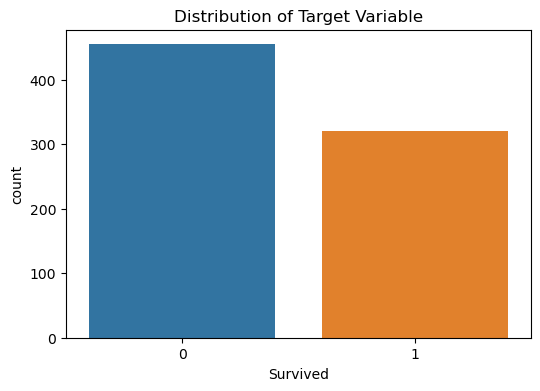

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df_train)
plt.title('Distribution of Target Variable')
plt.show()

Target variable Survived is categorical and has two categories- '0' or '1', hence this is a Classification Project. Maximum category found is '0' which is not survived and '1' is survived.

This shows that the majority of clients in the dataset did not survive.

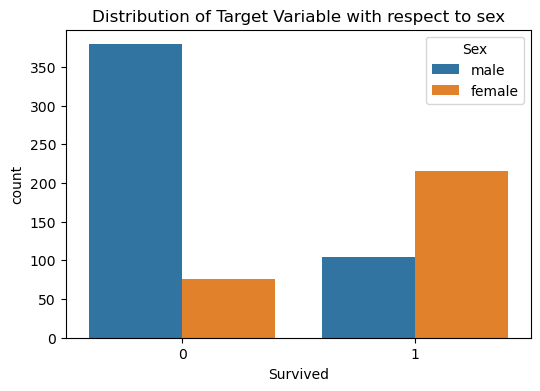

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived',hue='Sex',data=df_train)
plt.title('Distribution of Target Variable with respect to sex')
plt.show()

Observing the countplot people who have not survived most of them are male ,but in case of survived people most of them are female

In [41]:
women = df_train.loc[df_train.Sex=='female']['Survived']
rate_women=sum(women)/len(women) * 100
print(' % of women survivers : ', rate_women)

 % of women survivers :  73.97260273972603


In [42]:
men=df_train.loc[df_train.Sex=='male']['Survived']
rate_men=sum(men)/len(men) * 100
print(' % of men survivers : ', rate_men)

 % of men survivers :  21.532091097308488


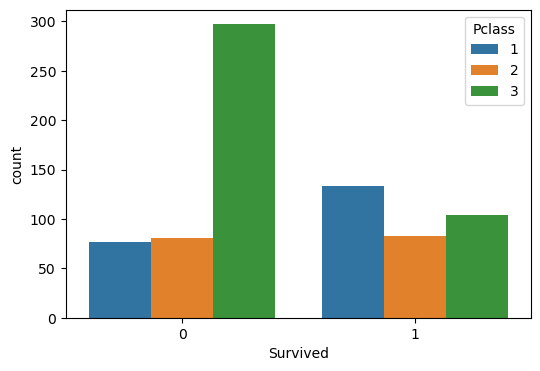

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived',hue='Pclass',data=df_train)       #pclass= Ticket class(1st, 2nd, 3rd)
plt.show()


People who have survived most of them took first class ticket, followed by third class and least have took 2nd class ticket.
People who didnt survive most of them took 3rd class ticket and least people took 1st class ticket.

In [44]:
class1=df_train.loc[df_train.Pclass==1]['Survived']
rate_class1=sum(class1)/len(class1) * 100
print(' % of Class1 Survivers : ', rate_class1)

 % of Class1 Survivers :  63.33333333333333


In [45]:
class2=df_train.loc[df_train.Pclass==2]['Survived']
rate_class2=sum(class2)/len(class2) * 100
print(' % of Class2 Survivers : ', rate_class2)

 % of Class2 Survivers :  50.609756097560975


In [46]:
class3=df_train.loc[df_train.Pclass==3]['Survived']
rate_class3=sum(class3)/len(class3) * 100
print(' % of Class3 Survivers : ', rate_class3)

 % of Class3 Survivers :  25.935162094763093


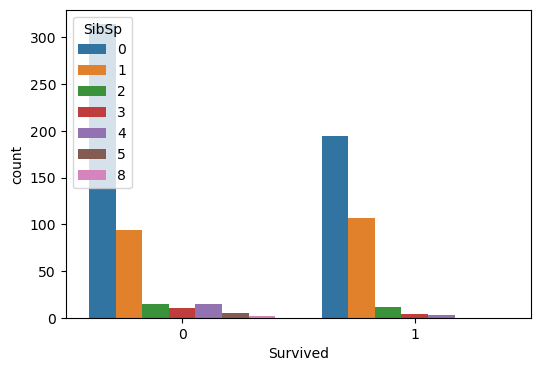

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived',hue='SibSp',data=df_train)      #SibSp = #of siblings/spouses aboard the Titanic
plt.show()

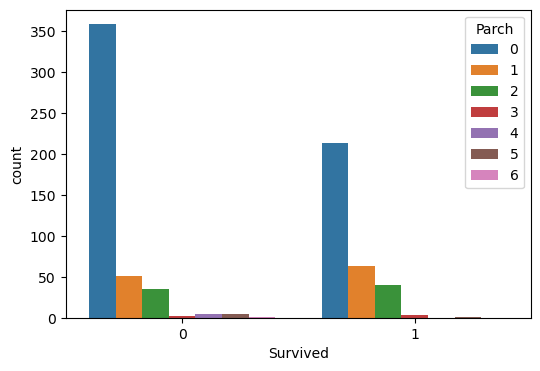

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived',hue='Parch',data=df_train)      #Parch =#of parents/children aboard the Titanic
plt.show()

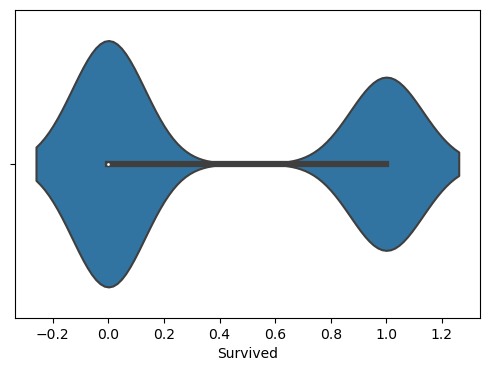

In [50]:
plt.figure(figsize=(6,4))
sns.violinplot(x='Survived',hue='Age',data=df_train)
plt.show()

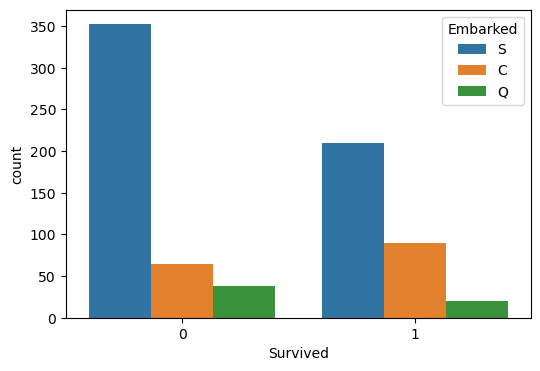

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived',hue='Embarked',data=df_train)
plt.show()


#Embarked=Port of Embarkation C = Cherbourg,Q = Queenstown,S = Southampton

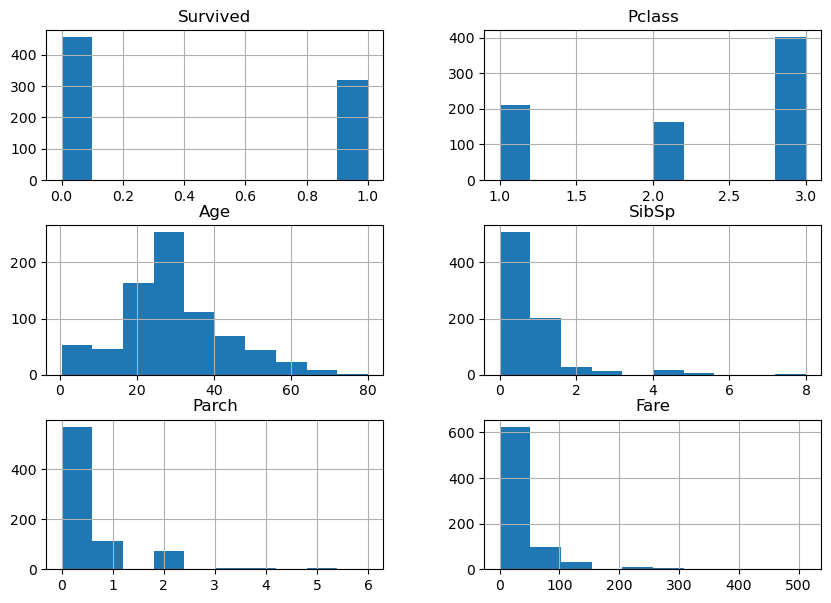

In [52]:
df_train.hist(figsize=(10,7));

<AxesSubplot:>

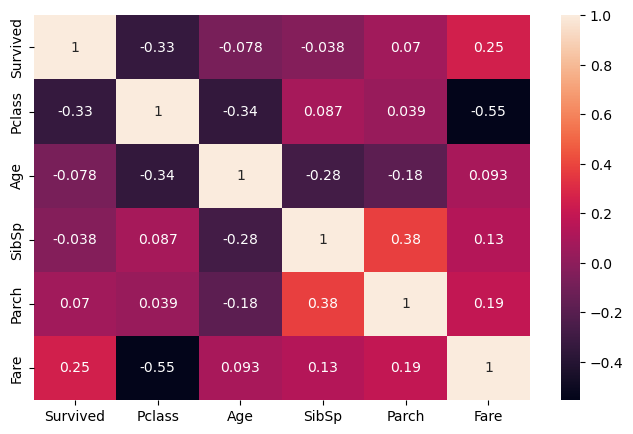

In [53]:
plt.figure(figsize=(8,5))
sns.heatmap(df_train.corr() , annot=True)

<AxesSubplot:>

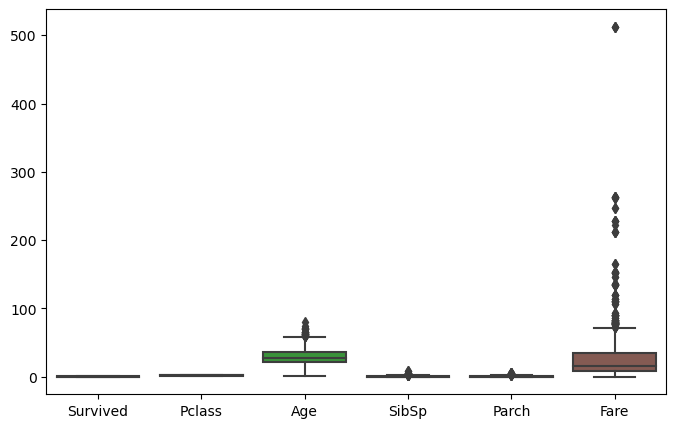

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_train)

<AxesSubplot:>

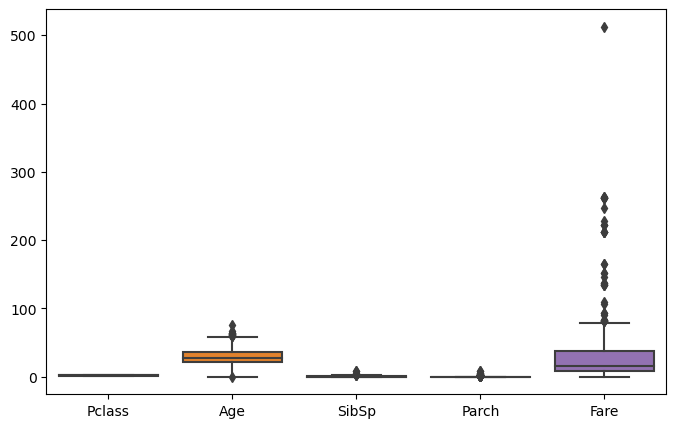

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_test)

### Outlier Treatment

In [56]:
num=['Age', 'SibSp', 'Parch','Fare']

In [57]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [58]:
for column in num:
        lr,ur=remove_outlier(df_train[column])
        df_train[column]=np.where(df_train[column]>ur,ur,df_train[column])
        df_train[column]=np.where(df_train[column]<lr,lr,df_train[column])

<AxesSubplot:>

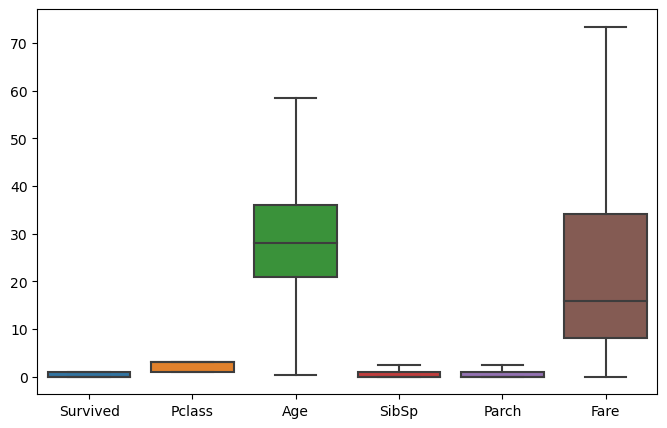

In [59]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_train)

In [60]:
for column in num:
        lr,ur=remove_outlier(df_test[column])
        df_test[column]=np.where(df_test[column]>ur,ur,df_test[column])
        df_test[column]=np.where(df_test[column]<lr,lr,df_test[column])

<AxesSubplot:>

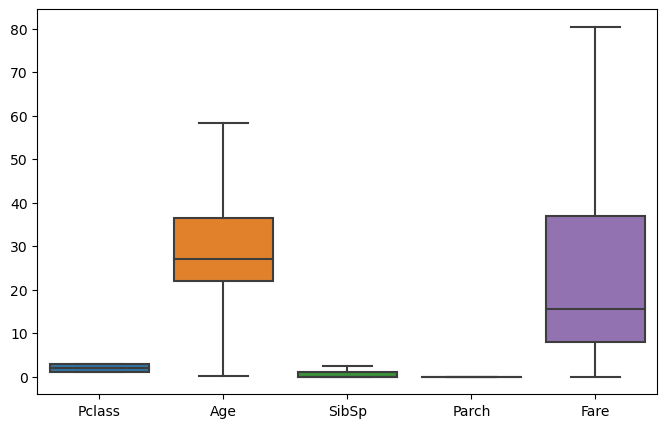

In [61]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_test)

### Encoding dataset

In [62]:
df_train.replace({'female':0 , "male":1}, inplace =True)
df_test.replace({'female':0 , "male":1}, inplace =True)

In [63]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [64]:
df_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [65]:
df_train=pd.get_dummies(df_train, columns=["Embarked"] ,prefix='Emb',drop_first=True)
df_test=pd.get_dummies(df_test, columns=["Embarked"] , prefix='Emb',drop_first=True)

In [66]:
df_train=pd.get_dummies(df_train, columns=["Pclass"],drop_first=True)
df_test=pd.get_dummies(df_test, columns=["Pclass"],drop_first=True)

In [67]:
df_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S,Pclass_2,Pclass_3
0,0,1,22.0,1.0,0.0,7.2500,0,1,0,1
1,1,0,38.0,1.0,0.0,71.2833,0,0,0,0
2,1,0,26.0,0.0,0.0,7.9250,0,1,0,1
3,1,0,35.0,1.0,0.0,53.1000,0,1,0,0
4,0,1,35.0,0.0,0.0,8.0500,0,1,0,1


In [68]:
df_test.head()

,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S,Pclass_2,Pclass_3
0,1,34.50,0.0,0.0,7.8292,1,0,0,1
1,0,47.00,1.0,0.0,7.0000,0,1,0,1
2,1,58.25,0.0,0.0,9.6875,1,0,1,0
3,1,27.00,0.0,0.0,8.6625,0,1,0,1
4,0,22.00,1.0,0.0,12.2875,0,1,0,1


### Checking Class Imbalance

In [69]:
df_train['Survived'].value_counts()

0    455
1    320
Name: Survived, dtype: int64

In [70]:
y=['Not survived','Survived']
y

['Not survived', 'Survived']

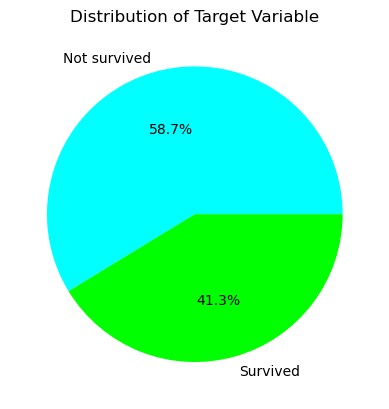

In [71]:
plt.pie(df_train['Survived'].value_counts(),labels=y, autopct='%1.1f%%',colors=['cyan','lime'])
plt.title('Distribution of Target Variable');

### Standardize the data using any one of the scalers provided by sklearn

In [73]:
df_train

,Survived,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S,Pclass_2,Pclass_3
0,0,1,22.0,1.0,0.0,7.2500,0,1,0,1
1,1,0,38.0,1.0,0.0,71.2833,0,0,0,0
2,1,0,26.0,0.0,0.0,7.9250,0,1,0,1
3,1,0,35.0,1.0,0.0,53.1000,0,1,0,0
4,0,1,35.0,0.0,0.0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,0,39.0,0.0,2.5,29.1250,1,0,0,1
887,1,0,19.0,0.0,0.0,30.0000,0,1,0,0
888,0,0,28.0,1.0,2.0,23.4500,0,1,0,1
889,1,1,26.0,0.0,0.0,30.0000,0,0,0,0


In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
std_scale=StandardScaler()
std_scale

StandardScaler()

In [76]:
df_train_Std=df_train.copy()

In [77]:
num_cols=['Age','SibSp','Parch','Fare']

In [78]:
# assuming your encoded data is stored in a pandas DataFrame called 'df_std'

df_train_Std[num_cols] = std_scale.fit_transform(df_train_Std[num_cols])

In [79]:
df_train_Std[num_cols].head()

,Age,SibSp,Parch,Fare
0,-0.557683,0.766127,-0.548088,-0.846218
1,0.654157,0.766127,-0.548088,1.955092
2,-0.254723,-0.639195,-0.548088,-0.816688
3,0.426937,0.766127,-0.548088,1.159615
4,0.426937,-0.639195,-0.548088,-0.811220


In [80]:
df_train_Std.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S,Pclass_2,Pclass_3
0,0,1,-0.557683,0.766127,-0.548088,-0.846218,0,1,0,1
1,1,0,0.654157,0.766127,-0.548088,1.955092,0,0,0,0
2,1,0,-0.254723,-0.639195,-0.548088,-0.816688,0,1,0,1
3,1,0,0.426937,0.766127,-0.548088,1.159615,0,1,0,0
4,0,1,0.426937,-0.639195,-0.548088,-0.811220,0,1,0,1


In [81]:
df_test_Std = df_test.copy()

In [82]:
# assuming your encoded data is stored in a pandas DataFrame called 'df_std'

df_test_Std[num_cols] = std_scale.fit_transform(df_test_Std[num_cols])

In [83]:
df_test_Std[num_cols].head()

,Age,SibSp,Parch,Fare
0,0.377443,-0.662248,0.0,-0.802109
1,1.350651,0.874168,0.0,-0.835155
2,2.226538,-0.662248,0.0,-0.728049
3,-0.206481,-0.662248,0.0,-0.768899
4,-0.595764,0.874168,0.0,-0.624429


In [84]:
df_test_Std.head()

,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S,Pclass_2,Pclass_3
0,1,0.377443,-0.662248,0.0,-0.802109,1,0,0,1
1,0,1.350651,0.874168,0.0,-0.835155,0,1,0,1
2,1,2.226538,-0.662248,0.0,-0.728049,1,0,1,0
3,1,-0.206481,-0.662248,0.0,-0.768899,0,1,0,1
4,0,-0.595764,0.874168,0.0,-0.624429,0,1,0,1


### Logistic Regression

In [85]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings 
warnings.filterwarnings( "ignore")

In [86]:
x=df_train_Std.drop('Survived',axis=1)

y=df_train_Std['Survived']

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [88]:
# Importing Various ML models and accuracy score :

from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [89]:
models = {
    "SVM": SVC(),
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name , model in models.items():
    print(f"{name} : ")
    
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print()

SVM : 
Accuracy: 0.803
Precision: 0.821
Recall: 0.667
F1-score: 0.736

Logistic Regression : 
Accuracy: 0.807
Precision: 0.787
Recall: 0.729
F1-score: 0.757

Decision Tree : 
Accuracy: 0.704
Precision: 0.624
Recall: 0.708
F1-score: 0.663

Random Forest : 
Accuracy: 0.760
Precision: 0.700
Recall: 0.729
F1-score: 0.714

